In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
#cidade = 'saopaulo'

#epw_filebase = "BRA_SP_Sao.Paulo-Congonhas.AP.837800_TRY.1954.epw"
#epw_file2020 = "BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2020.epw"
#epw_file2050 = "BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2050.epw"
#epw_file2080 = "BRA_Sao Paulo-Congonhas AP_HadCM3-A2-2080.epw"

#cidade = 'brasilia'

#epw_filebase = "BRA_DF_Brasilia-Kubitschek.Intl.AP.833780_TRY.1962.epw"
#epw_file2020 = "BRA_Brasilia-Kubitschek Intl AP_HadCM3-A2-2020.epw"
#epw_file2050 = "BRA_Brasilia-Kubitschek Intl AP_HadCM3-A2-2050.epw"
#epw_file2080 = "BRA_Brasilia-Kubitschek Intl AP_HadCM3-A2-2080.epw"

#cidade = 'belem'

#epw_filebase = "BRA_PA_Belem-Ribeiro.Intl.AP.821930_TRY.1964.epw"
#epw_file2020 = "BRA_Belem-Ribeiro Intl AP_HadCM3-A2-2020.epw"
#epw_file2050 = "BRA_Belem-Ribeiro Intl AP_HadCM3-A2-2050.epw"
#epw_file2080 = "BRA_Belem-Ribeiro Intl AP_HadCM3-A2-2080.epw"

#cidade = 'portoalegre'

#epw_filebase = "POA_TRY_1954_modified_MKB.epw"
#epw_file2020 = "BRA_Porto Alegre-Filho Intl AP_HadCM3-A2-2020.epw"
#epw_file2050 = "BRA_Porto Alegre-Filho Intl AP_HadCM3-A2-2050.epw"
#epw_file2080 = "BRA_Porto Alegre-Filho Intl AP_HadCM3-A2-2080.epw"

#cidade = 'salvador'

#epw_filebase = "BRA_BA_Salvador-Magalhaes.Intl.AP.832480_TRY.1961_modified_mkb.epw"
#epw_file2020 = "BRA_Salvador-Magalhaes Intl AP_HadCM3-A2-2020.epw"
#epw_file2050 = "BRA_Salvador-Magalhaes Intl AP_HadCM3-A2-2050.epw"
#epw_file2080 = "BRA_Salvador-Magalhaes Intl AP_HadCM3-A2-2080.epw"

cidade = 'vitoria'

epw_filebase = "BRA_ES_Vitoria-Salles.AP.836490_TRY.1962_modified_mkb.epw"
epw_file2020 = "BRA_Vitoria-Salles AP_HadCM3-A2-2020.epw"
epw_file2050 = "BRA_Vitoria-Salles AP_HadCM3-A2-2050.epw"
epw_file2080 = "BRA_Vitoria-Salles AP_HadCM3-A2-2080.epw"


In [68]:
df_base = pd.read_csv(epw_filebase, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_2020 = pd.read_csv(epw_file2020, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_2050 = pd.read_csv(epw_file2050, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)
df_2080 = pd.read_csv(epw_file2080, skiprows=[0,1,2,3,4,5,6,7], header=None, low_memory=False)

In [69]:
df_base[1] = df_base[1].map("{:02}".format)
df_base[2] = df_base[2].map("{:02}".format)
df_base[3] = df_base[3].map("{:02}".format)

df_2020[1] = df_2020[1].map("{:02}".format)
df_2020[2] = df_2020[2].map("{:02}".format)
df_2020[3] = df_2020[3].map("{:02}".format)

df_2050[1] = df_2050[1].map("{:02}".format)
df_2050[2] = df_2050[2].map("{:02}".format)
df_2050[3] = df_2050[3].map("{:02}".format)

df_2080[1] = df_2080[1].map("{:02}".format)
df_2080[2] = df_2080[2].map("{:02}".format)
df_2080[3] = df_2080[3].map("{:02}".format)

In [70]:
df_base[3] = df_base[3].replace(['24'],'00')
df_2020[3] = df_2020[3].replace(['24'],'00')
df_2050[3] = df_2050[3].replace(['24'],'00')
df_2080[3] = df_2080[3].replace(['24'],'00')

In [71]:
df_base[0]=df_base[0].map(str)+'-'+df_base[1].map(str)+'-'+df_base[2].map(str)+' '+df_base[3].map(str)+':00:00'
df_2020[0]=df_2020[0].map(str)+'-'+df_2020[1].map(str)+'-'+df_2020[2].map(str)+' '+df_2020[3].map(str)+':00:00'
df_2050[0]=df_2050[0].map(str)+'-'+df_2050[1].map(str)+'-'+df_2050[2].map(str)+' '+df_2050[3].map(str)+':00:00'
df_2080[0]=df_2080[0].map(str)+'-'+df_2080[1].map(str)+'-'+df_2080[2].map(str)+' '+df_2080[3].map(str)+':00:00'

In [72]:
df_base[0] = pd.to_datetime(df_base[0], infer_datetime_format=True)
df_2020[0] = pd.to_datetime(df_2020[0], infer_datetime_format=True)
df_2050[0] = pd.to_datetime(df_2050[0], infer_datetime_format=True)
df_2080[0] = pd.to_datetime(df_2080[0], infer_datetime_format=True)
df = df_2020.append(df_2050.append(df_2080))

In [73]:
scenarios_type_colors = ['#FFD656',  # Base
                    '#FF9250',  # 2020
                    '#C42700',  # 2050
                    '#C30000',  # 2080
                   ]

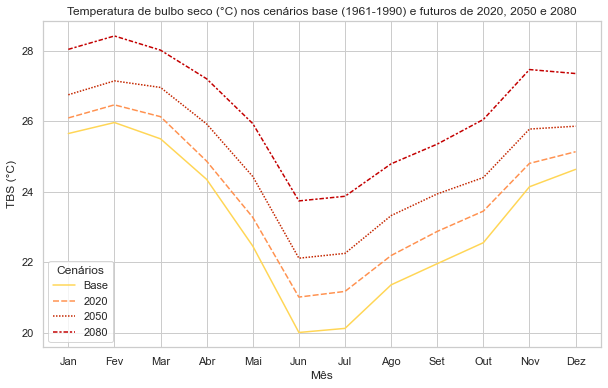

In [74]:
#gráfico da temperatura de bulbo seco média mensal para cada cenário

df_base_meanmonth = df_base.groupby([df_base[0].dt.month])[6].mean()
df_2020_meanmonth = df_2020.groupby([df_2020[0].dt.month])[6].mean()
df_2050_meanmonth = df_2050.groupby([df_2050[0].dt.month])[6].mean()
df_2080_meanmonth = df_2080.groupby([df_2080[0].dt.month])[6].mean()

df_dbt_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                     dbt_base=df_base_meanmonth,dbt_2020=df_2020_meanmonth,
                                     dbt_2050=df_2050_meanmonth,dbt_2080=df_2080_meanmonth))
df_dbt_meanmonth

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable', style='variable',
             data=pd.melt(df_dbt_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("TBS (°C)")
plt.title("Temperatura de bulbo seco (°C) nos cenários base (1961-1990) e futuros de 2020, 2050 e 2080")
plt.legend(title='Cenários', labels=['Base', '2020', '2050', '2080'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_tbs.png')  


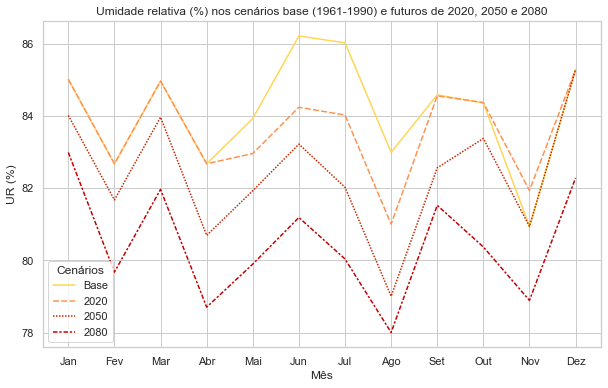

In [75]:
#gráfico da umidade relativa média mensal para cada cenário

df_base_meanmonth = df_base.groupby([df_base[0].dt.month])[8].mean()
df_2020_meanmonth = df_2020.groupby([df_2020[0].dt.month])[8].mean()
df_2050_meanmonth = df_2050.groupby([df_2050[0].dt.month])[8].mean()
df_2080_meanmonth = df_2080.groupby([df_2080[0].dt.month])[8].mean()

df_rh_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                    dbt_base=df_base_meanmonth,dbt_2020=df_2020_meanmonth,
                                     dbt_2050=df_2050_meanmonth,dbt_2080=df_2080_meanmonth))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_rh_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("UR (%)")
plt.title("Umidade relativa (%) nos cenários base (1961-1990) e futuros de 2020, 2050 e 2080")
plt.legend(title='Cenários', labels=['Base', '2020', '2050', '2080'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_rh.png') 

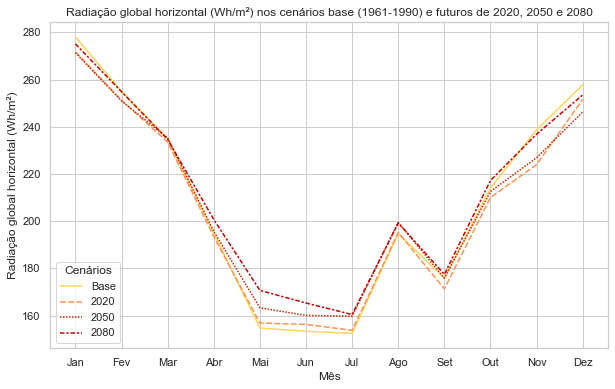

In [76]:
#gráfico da radiação global horizontal média mensal para cada cenário

df_base_meanmonth = df_base.groupby([df_base[0].dt.month])[13].mean()
df_2020_meanmonth = df_2020.groupby([df_2020[0].dt.month])[13].mean()
df_2050_meanmonth = df_2050.groupby([df_2050[0].dt.month])[13].mean()
df_2080_meanmonth = df_2080.groupby([df_2080[0].dt.month])[13].mean()

df_ghi_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                    ghi_base=df_base_meanmonth,ghi_2020=df_2020_meanmonth,
                                     ghi_2050=df_2050_meanmonth,ghi_2080=df_2080_meanmonth))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_ghi_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("Radiação global horizontal (Wh/m²)")
plt.title("Radiação global horizontal (Wh/m²) nos cenários base (1961-1990) e futuros de 2020, 2050 e 2080")
plt.legend(title='Cenários', labels=['Base', '2020', '2050', '2080'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_ghi.png') 

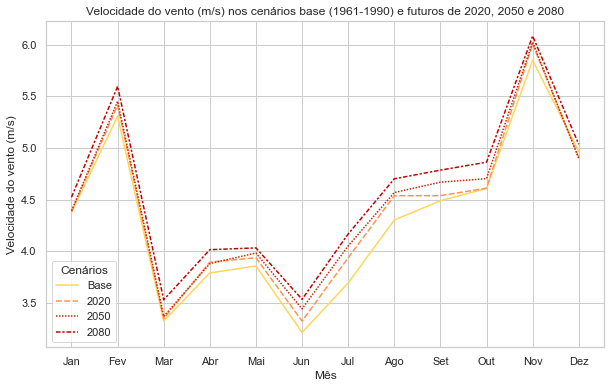

In [77]:
#gráfico da velocidade do vendo média mensal para cada cenário

df_base_meanmonth = df_base.groupby([df_base[0].dt.month])[21].mean()
df_2020_meanmonth = df_2020.groupby([df_2020[0].dt.month])[21].mean()
df_2050_meanmonth = df_2050.groupby([df_2050[0].dt.month])[21].mean()
df_2080_meanmonth = df_2080.groupby([df_2080[0].dt.month])[21].mean()

df_ws_meanmonth = pd.DataFrame(dict(time=('Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'),
                                    ws_base=df_base_meanmonth,ws_2020=df_2020_meanmonth,
                                     ws_2050=df_2050_meanmonth,ws_2080=df_2080_meanmonth))

plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g = sns.lineplot(x='time', y='value', hue='variable',  style='variable',
             data=pd.melt(df_ws_meanmonth, ['time']), palette=scenarios_type_colors)


plt.xlabel("Mês")
plt.ylabel("Velocidade do vento (m/s)")
plt.title("Velocidade do vento (m/s) nos cenários base (1961-1990) e futuros de 2020, 2050 e 2080")
plt.legend(title='Cenários', labels=['Base', '2020', '2050', '2080'])
plt.show(g)

fig = g.get_figure()
fig.savefig(cidade+'_ws.png') 

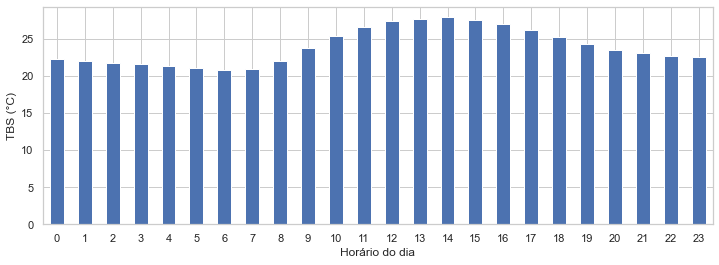

In [78]:
fig, axs = plt.subplots(figsize=(12, 4))

df_2020.groupby(df_2020[0].dt.hour)[6].mean().plot(kind='bar', rot=0, ax=axs)

#<AxesSubplot:xlabel='datetime'>

plt.xlabel("Horário do dia");  # custom x label using matplotlib
plt.ylabel("TBS (°C)");

Text(0, 0.5, 'Radiação global horizontal (Wh/m²)')

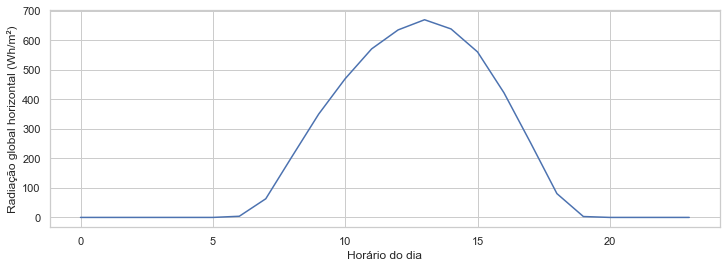

In [79]:
fig, axs = plt.subplots(figsize=(12, 4))

df_2020.groupby(df_2020[0].dt.hour)[13].mean().plot(kind='line', rot=0, ax=axs)

#<AxesSubplot:xlabel='datetime'>

plt.xlabel("Horário do dia");  # custom x label using matplotlib
plt.ylabel("Radiação global horizontal (Wh/m²)")